In [1]:
# Cell 1: Imports
import joblib
import numpy as np

from credit_models import modelValuation


In [2]:
# Cell 2: Load predictions from each model
proba_lgb  = joblib.load("proba_lightgbm.pkl")
proba_rf   = joblib.load("proba_rf.pkl")
proba_cb   = joblib.load("proba_cb.pkl")
proba_tab  = joblib.load("proba_tab.pkl")
Y_test     = joblib.load("Y_test.pkl")



[⚙️ Ensemble (equal‐weight avg)] Using Best Threshold = 0.3637 (F1 = 0.747, P = 0.629, R = 0.920)

🔍 [Ensemble (equal‐weight avg)] Classification Report @ Threshold = 0.36365754570018965
                 precision    recall  f1-score   support

Good Credit (0)       0.85      0.46      0.60       500
 Bad Credit (1)       0.63      0.92      0.75       500

       accuracy                           0.69      1000
      macro avg       0.74      0.69      0.67      1000
   weighted avg       0.74      0.69      0.67      1000

🧠 Explanation of Key Metrics:
- Precision (Good Credit): 0.85 → 85% of those predicted as good credit were correct.
- Recall (Good Credit)   : 0.46 → 46% of all actual good credits were correctly identified.
- Precision (Bad Credit) : 0.63 → 63% of those predicted as bad credit were correct.
- Recall (Bad Credit)    : 0.92 → 92% of all actual bad credits were correctly identified.
- Accuracy               : 0.69 → 69% of all predictions were correct.
- ROC-AUC   

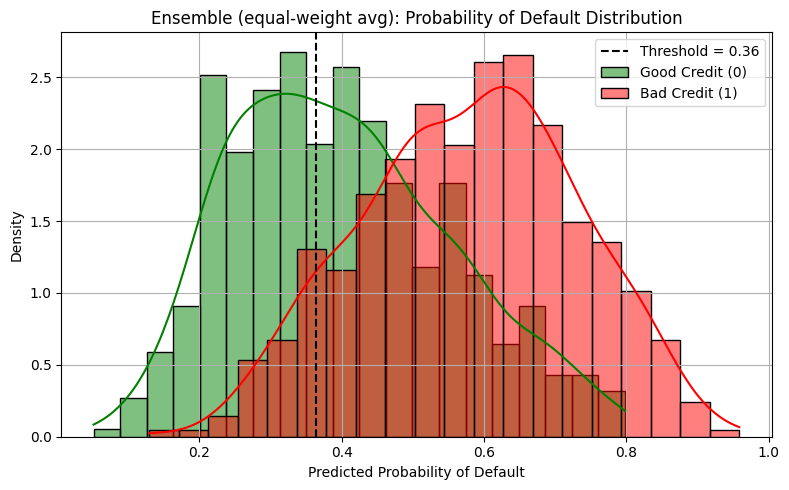

In [3]:
# Cell 3: Average probabilities and make final prediction
all_probas = [proba_lgb, proba_rf, proba_cb, proba_tab]
avg_proba = np.mean(all_probas, axis=0)
y_pred_ensemble, chosen_thresh = modelValuation(
    "Ensemble (equal‐weight avg)", Y_test, avg_proba, use_best_threshold= True
)



[⚙️ Ensemble (equal‐weight avg)] Using Default Threshold = 0.5

🔍 [Ensemble (equal‐weight avg)] Classification Report @ Threshold = 0.5
                 precision    recall  f1-score   support

Good Credit (0)       0.71      0.75      0.73       500
 Bad Credit (1)       0.73      0.69      0.71       500

       accuracy                           0.72      1000
      macro avg       0.72      0.72      0.72      1000
   weighted avg       0.72      0.72      0.72      1000

🧠 Explanation of Key Metrics:
- Precision (Good Credit): 0.71 → 71% of those predicted as good credit were correct.
- Recall (Good Credit)   : 0.75 → 75% of all actual good credits were correctly identified.
- Precision (Bad Credit) : 0.73 → 73% of those predicted as bad credit were correct.
- Recall (Bad Credit)    : 0.69 → 69% of all actual bad credits were correctly identified.
- Accuracy               : 0.72 → 72% of all predictions were correct.
- ROC-AUC                : 0.79 → Model distinguishes good vs. 

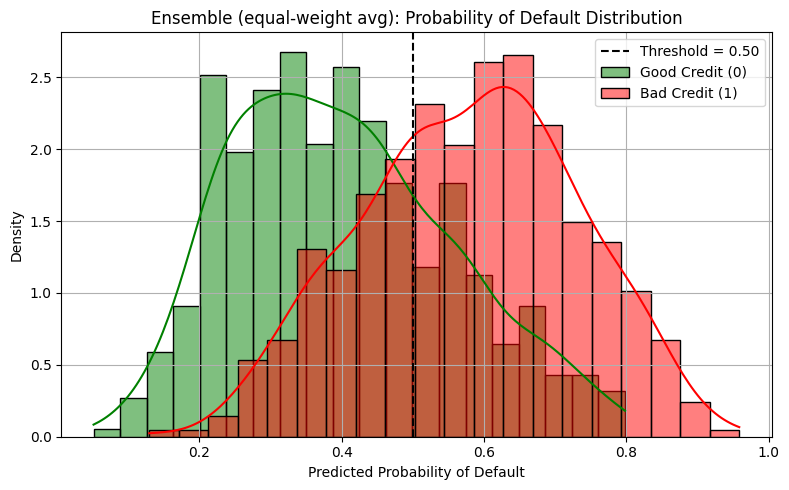

In [4]:
y_pred_ensemble, chosen_thresh = modelValuation(
    "Ensemble (equal‐weight avg)", Y_test, avg_proba, use_best_threshold=False
)